## Mathematics of Machine Learning

### 5th exercise sheet - task 1b

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#### (1) Kernel Perceptron Algorithm

In [2]:
def my_kernel_perceptron(K, y):
    
    # Read m number of data from y or K
    m = len(y)

    # Initializations
    alpha = np.zeros((m, 1))
    b = 0
    t = 0

    alphas = np.append(alpha, b)[:, None]
    print(alphas.shape)

    # Check whether all constraints are fulfilled
    check = y[:, None] * np.dot(K, alpha+b)

    while np.min(check) <= 0:
        # Find all unsatisfied constraints
        inds = [i for (i, val) in enumerate(check) if val <= 0]

        # Select a constraint that is not fulfilled
        i = random.choice(inds)

        # Update according to iteration rule
        alpha[i] = alpha[i] + y[i]
        b = b + y[i]
        alphas = np.c_[alphas, np.append(alpha, b)[:, None]]

        # Check the constraint 
        check = y[:, None] * np.dot(K, alpha+b)

        # Increase step counter
        t += 1

    # Define output values
    T = t
    isSV = np.abs(alpha) > 0
    
    return {'alpha': alpha, 'bias': b, 'T': T, 'isSV': isSV}

#### (2) Apply Kernel Perceptron Algorithm

##### (2.1) Data Preparation

In [3]:
# Load data
x = np.genfromtxt("data_KSVM_X.csv", delimiter=',')
y = np.genfromtxt("data_KSVM_Y.csv", delimiter=',')

# print(x)
# print(x.shape)
# print(y)
# print(y.shape)

In [4]:
indp = [i for (i, val) in enumerate(y) if val == 1] # Data with +1 
indm = [i for (i, val) in enumerate(y) if val == -1] # Data with -1

In [5]:
m = len(y)
print(m)

300


In [6]:
# Selection of the Gaussian kernel function
kappa = 4

def K_fun(x, y): return np.exp(-kappa * (np.linalg.norm(x-y, ord=2))**2) # ord=2 for Euclidean norm

In [7]:
# Create the Gram matrix with regard to the Gaussian kernel function
K = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        K[i][j] = K_fun(x[:, i], x[:, j])
        
print(K)
print(K.shape)

[[1.00000000e+00 7.10298375e-14 8.28211436e-20 ... 6.29282780e-06
  2.82921538e-16 3.22823487e-33]
 [7.10298375e-14 1.00000000e+00 2.51987418e-26 ... 4.78272118e-14
  1.06066990e-05 3.21756902e-21]
 [8.28211436e-20 2.51987418e-26 1.00000000e+00 ... 3.51445867e-05
  1.45592722e-10 2.61845069e-07]
 ...
 [6.29282780e-06 4.78272118e-14 3.51445867e-05 ... 1.00000000e+00
  2.26584685e-07 5.96143594e-14]
 [2.82921538e-16 1.06066990e-05 1.45592722e-10 ... 2.26584685e-07
  1.00000000e+00 3.70592454e-06]
 [3.22823487e-33 3.21756902e-21 2.61845069e-07 ... 5.96143594e-14
  3.70592454e-06 1.00000000e+00]]
(300, 300)


##### (2.2) Apply KP Algorithm

In [8]:
result = my_kernel_perceptron(K, y)

alpha_S = result['alpha']
b_S = result['bias']
T = result['T']
isSV = result['isSV']


(301, 1)


In [9]:
# print(alpha_S)
print(alpha_S.shape)
print(b_S)
print(T)


(300, 1)
0.0
122


In [10]:
# np.savetxt("alpha_S.csv", alpha_S, delimiter=',')
# np.savetxt("isSV.csv", isSV, delimiter=',')

#### (3) Plot the result

In [11]:
# Generate discretization grid
x_min = -1.75
x_max = 2.25
y_min = -1.75
y_max = 2.25

XX1, XX2 = np.mgrid[x_min:x_max + 4/500:4/500, y_min:y_max + 4/500:4/500]

# Grid point matrice
M = np.c_[XX1.ravel(), XX2.ravel()]

In [12]:
# Find support vectors
SV_supp = np.array([x[:, i] for (i, val) in enumerate(isSV) if val == True]).T # Coordinates of the SV
# print(SV_supp)
m_supp = SV_supp.shape[1] # Number of SV
print(m_supp)

93


In [13]:
alpha_S = np.array([alpha_S[i] for (i, val) in enumerate(isSV) if val == True])
print(alpha_S.shape)

(93, 1)


In [14]:
# Distance function to the support vectors
def SV_fun(x): return np.sum((SV_supp - np.tile(x, (1, m_supp)))**2, axis=0)[:, None].T

In [15]:
# Learned RKHS function
def kfun_S(x): return np.dot(np.exp(-kappa * SV_fun(x)), alpha_S) + b_S

In [16]:
# Values of the RKHS function on the grid
Z = np.empty((len(M), 1))
for i in range(len(M)):
    Z[i] = kfun_S(M[i][:, None])
print(Z)
print(Z.shape)

[[-0.55085304]
 [-0.57170208]
 [-0.59307262]
 ...
 [ 2.0777414 ]
 [ 2.05837523]
 [ 2.03814606]]
(251001, 1)


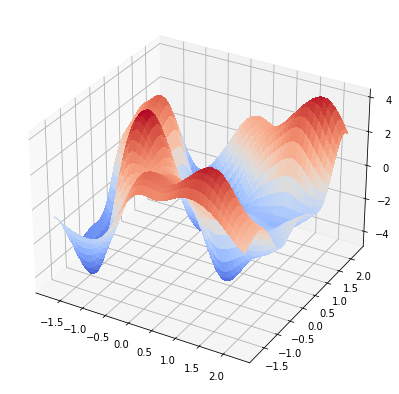

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

Z_reshape = Z.reshape(XX1.shape)
ax.plot_surface(XX1, XX2, Z_reshape, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ax.view_init(30, 60)
plt.show()

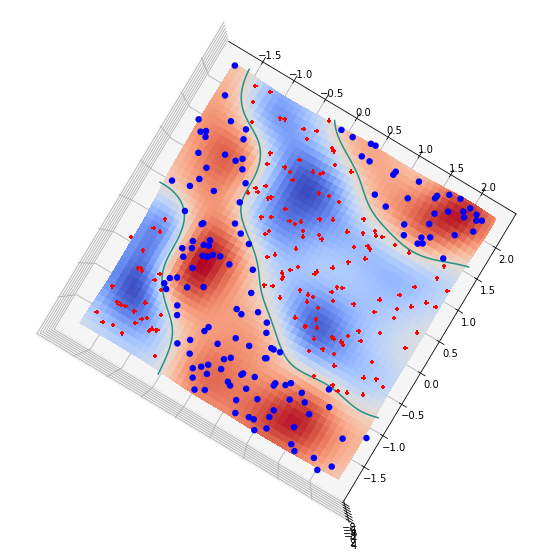

In [18]:
# 2D-Plot

C = np.max(Z)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

ax.plot_surface(XX1, XX2, (Z-C).reshape(XX1.shape), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Plot learned dividing lines
plt.contour(XX1, XX2, Z.reshape(XX1.shape), levels = 0)  # label = "$h_S$"

ax.scatter(x[0][indp], x[1][indp], c="b", marker="o", linewidths = 2, label = "1")
ax.scatter(x[0][indm], x[1][indm], c="r", marker="+", linewidths = 2, label = "-1")

# Plot support vectors
plt.plot(SV_supp[:, 0], SV_supp[:, 1], marker="o", markersize=12, 
         markerfacecolor="None", linestyle='None', label = "Support Vectors")

ax.view_init(90)

plt.show()